<a href="https://colab.research.google.com/github/gabrielwilliamxavier/python_engenhariaquimica/blob/main/SistemadeEdo_TanquesAcoplados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Resolução de Sistema de EDO**


---


*Gabriel Xavier*

# **Problema**

No instante de tempo t=0, o Tanque 1 contém 10 litros de água pura e o 
Tanque 2 contém 20 litros de uma mistura de água com 12 Kg de sal. Água pura está sendo constantemente bombeada para dentro do Tanque 1 a uma taxa de 10 litros por minuto, as misturas salinas são trocadas entre os dois tanques como na figura acima, e a mistura escoa do Tanque 2 a uma taxa de 10 litros por minuto. Encontre a quantidade de sal em cada tanque no instante de tempo t.


---


*Obtido em https://www.dm.ufscar.br/profs/waldeck/sourceforge/pngtest.php*




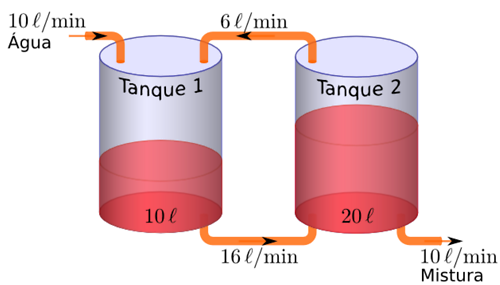

### **Solução**
Como a quantidade de líquido que entra em cada tanque é igual à quantidade que sai, o volume de mistura em cada tanque permanece constante. Então o Tanque 1 contém sempre 10 litros de mistura e o Tanque 2 contém sempre 20 litros de mistura. Agora sejam

**x1(t)= quantidade de sal no Tanque 1 no instante t**

**x2(t)= quantidade de sal no Tanque 2 no instante t**

As taxas de variação instantânea da quantidade de sal em cada tanque são respectivamente:


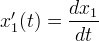 e 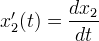


Cada uma dessas taxas deve ser igual à diferença entre a taxa à qual o sal está entrando menos a taxa à qual o sal está saindo do respectivo tanque.


* No **Tanque 1**, a taxa à qual o sal está entrando é igual a
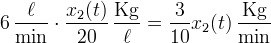

* Enquanto que a taxa à qual o sal está saindo é igual a
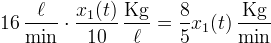

* Portanto,
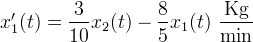

---

* No **Tanque 2**, a taxa à qual o sal está entrando é igual a
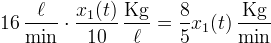

* Enquanto que a taxa à qual o sal está saindo é igual a
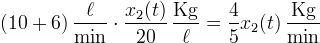

* Portanto,
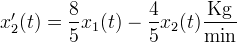

---

Foi dado que em t=0 a quantidade sal no tanque 1 é 0Kg enquanto no tanque 2 12Kg:

* x1(0) = 0
* x2(0) = 12

### **Sistema**

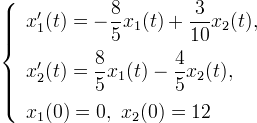

### **Resolução do Sistema por Python**

     tempo (min)  tanque 1 (kg)  tanque 2 (kg)
0           0.00       0.000000      12.000000
1           0.04       0.137275      11.626495
2           0.08       0.261816      11.272991
3           0.12       0.374638      10.938088
4           0.16       0.476676      10.620492
..           ...            ...            ...
296        11.84       0.019741       0.078963
297        11.88       0.019427       0.077710
298        11.92       0.019119       0.076476
299        11.96       0.018816       0.075262
300        12.00       0.018517       0.074068

[301 rows x 3 columns]


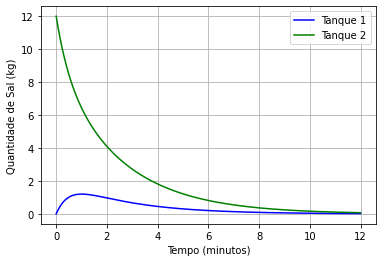

In [ ]:
import numpy as np

def edo(y, t):
  x1, x2 = y
  dydt = [(-8/5) * x1 + (3/10) * x2, (8/5) * x1 + (-4/5) * x2]
  return dydt


y0 = [0, 12] 
t = np.linspace(0, 12,  301)

from scipy.integrate import odeint
sol = odeint(edo, y0, t)

from pandas import DataFrame 
tempo = t
x1 = sol[:,0]
x2 = sol[:,1]
df = DataFrame({"tempo (min)": tempo, 'tanque 1 (kg)': x1, 'tanque 2 (kg)': x2})
df.to_excel('tanque.xlsx', sheet_name='Sheet1', index=False)
print(df)

from google.colab import files
#files.download('tanque.xlsx') 

import matplotlib.pyplot as plt
plt.plot(t, x1, 'b', label='Tanque 1')
plt.plot(t, x2, 'g', label='Tanque 2')
plt.legend(loc='best')
plt.xlabel('Tempo (minutos)')
plt.ylabel('Quantidade de Sal (kg)')
plt.grid()
plt.show()


Através da tabela é possível verificar a quantidade de sal em cada um dos tanques durante 300 minutos, onde observa-se que após esse tempo a quantidade de sal se aproxima de zero. A comparação de perda do sal no escoamento de cada um dos tanques pode ser analisada através do gráfico.